# Data Labelling Analysis (DLA) Dataset B

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for data labelling analisys
from data_labelling import mix_data
from data_labelling import split_data
from data_labelling import DataPreProcessor
from data_labelling import ClassificationModels

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/B_Cardio_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/B_Cardio_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/B_Cardio_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/B_Cardio_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/B_Cardio_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active','cardio']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':           id    age gender  height  weight  ap_hi  ap_lo cholesterol gluc  \
 0      67617  21876      1     154    80.0    130     90           2    1   
 1      96320  16717      2     162    70.0    140     90           1    1   
 2      17571  21128      2     174    92.0    150    100           1    1   
 3      46492  23366      2     173    76.0    120     82           1    1   
 4        945  20281      1     160    60.0    120     80           1    1   
 ...      ...    ...    ...     ...     ...    ...    ...         ...  ...   
 55995  53137  16001      2     170    75.0    150     80           1    1   
 55996   8918  23209      2     162    73.0    160     90           1    1   
 55997  78302  23589      1     169    74.0    120     80           1    1   
 55998   1197  18227      1     167    70.0    120     80           1    1   
 55999  22556  15114      2     177    64.0    120     80           1    1   
 
       smoke alco active cardio  
 0         0    0   

## 2. Mix real data with synthetic data

In [5]:
mixed_data = dict()
for name in SYNTHESIZERS :
    mixed_data[name] = mix_data(data['Real'], data[name])
mixed_data

{'GM':           id    age gender  height      weight  ap_hi  ap_lo cholesterol gluc  \
 14038  20049  16005      2     169   80.000000    150     90           3    3   
 38113  88768  23343      1     145   55.000000    120     60           1    1   
 13374  99358  23082      1     170   70.000000    130     80           3    1   
 47932  55300  15674      1     169  101.858999    138     87           1    1   
 20052  33447  15934      2     170   68.000000    120     60           1    1   
 ...      ...    ...    ...     ...         ...    ...    ...         ...  ...   
 1449   58784  17757      1     153   72.769827    151     98           3    3   
 4201   22361  17567      2     166   95.216473    126     56           1    1   
 53538  20205  22027      1     171   99.628071    133    121           1    1   
 22608  49913  18877      1     156   67.841491    112     57           1    1   
 46072  18042  21949      1     158   64.000000    140     80           3    1   
 
       s

- 0 for real data
- 1 for synthetic data

## 2. Split train and test data

In [6]:
train_len = 0.8
train_data = dict()
test_data = dict()
for name in SYNTHESIZERS :
    print(name)
    train_data[name], test_data[name] = split_data(mixed_data[name], train_len)
    print(train_data[name].shape, test_data[name].shape)
    print('Train data', train_data[name].groupby('Label').size())
    print('Test data', test_data[name].groupby('Label').size())
    print('##############################################')

GM
(89600, 14) (22399, 14)
Train data Label
0.0    44677
1.0    44923
dtype: int64
Test data Label
0.0    11322
1.0    11077
dtype: int64
##############################################
SDV
(89600, 14) (22399, 14)
Train data Label
0.0    44911
1.0    44689
dtype: int64
Test data Label
0.0    11089
1.0    11310
dtype: int64
##############################################
CTGAN
(89600, 14) (22399, 14)
Train data Label
0.0    44895
1.0    44705
dtype: int64
Test data Label
0.0    11105
1.0    11294
dtype: int64
##############################################
WGANGP
(89600, 14) (22399, 14)
Train data Label
0.0    44801
1.0    44799
dtype: int64
Test data Label
0.0    11199
1.0    11200
dtype: int64
##############################################


## 3. Train Classifiers

In [7]:
categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active','cardio']
numerical_columns = numerical_columns = data['Real'].select_dtypes(include=['int64']).columns.tolist()
categories = [np.array(range(2)), np.array(range(3)), np.array(range(3)), np.array(range(2)), np.array(range(2)), 
            np.array(range(2)), np.array(range(2))]

#initialize classifiers
classifiers_all = dict()
data_preprocessors = dict()

target = 'Label'

for name in SYNTHESIZERS : 
    print(name)
    
    classifiers_all[name] = ClassificationModels()
    
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(train_data[name].iloc[:, train_data[name].columns != target])
    y_train = train_data[name].loc[:, target]
    
    classifiers_all[name].train_classifiers(x_train, y_train)
    
    print('####################################################')

GM
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
SDV
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
CTGAN
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
WGANGP
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################


## 5. Evaluate Classifiers

In [8]:
results_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    
    x_test = data_preprocessors[name].preprocess_test_data(test_data[name].loc[:, test_data[name].columns != target])
    print(x_test.shape)
    y_test = test_data[name].loc[:, target]
    
    classifiers_all[name].evaluate_classifiers(x_test, y_test)
    print('####################################################')

GM
(22399, 21)
RF Tested
  model  accuracy  precision  recall      f1
0    RF    0.9604     0.9571  0.9631  0.9601
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.5805     0.6142  0.4081  0.4904
DT Tested
  model  accuracy  precision  recall      f1
0    DT    0.9629     0.9639  0.9609  0.9624
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.5012     0.4829  0.1211  0.1936
MLP Tested
  model  accuracy  precision  recall      f1
0   MLP    0.9393      0.952  0.9239  0.9377
####################################################
SDV
(22399, 21)
RF Tested
  model  accuracy  precision  recall      f1
0    RF     0.989     0.9903  0.9878  0.9891
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.9157     0.9938  0.8382  0.9094
DT Tested
  model  accuracy  precision  recall      f1
0    DT    0.9873     0.9877  0.9871  0.9874
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.5058     0.5054  0.9999  0.6714
MLP Tested


## 6. Analyse models results

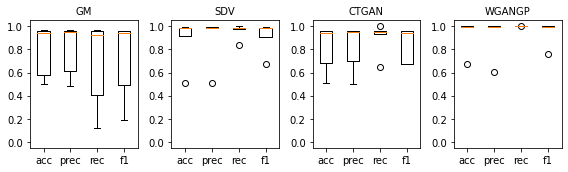

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 2.5))
axs_idxs = [[0,0], [0,1], [1,0], [1,1]]
axs_idxs = [0, 1, 2, 3]
idx = dict(zip(SYNTHESIZERS,axs_idxs))

for name in SYNTHESIZERS :
    ax_plot = axs[idx[name]]
    classifiers_all[name].plot_classification_metrics(ax_plot)
    ax_plot.set_title(name, fontsize=10)

plt.tight_layout()
fig.savefig('DATA LABELLING RESULTS/CLASSIFICATION_METRICS.svg', bbox_inches='tight')